In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
import sklearn
%precision 3

'%.3f'

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
cancer=load_breast_cancer()
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
scores=cross_val_score(tree,cancer.data,cancer.target,cv=5)
scores,scores.mean(),scores.std()

(array([0.904, 0.912, 0.956, 0.939, 0.956]), 0.933, 0.022)

ベストスコア：0.91
そのときのパラメータ(gamma,C):(0.001, 1.0)


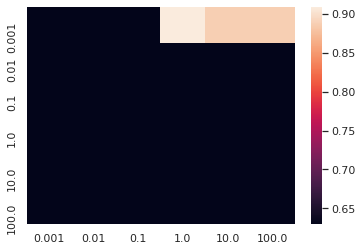

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
scores={}
for gamma in np.logspace(-3,2,num=6):
    for C in np.logspace(-3,2,num=6):
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        scores[(gamma,C)]=svm.score(X_test,y_test)
scores=pd.Series(scores)
print('ベストスコア：{:.2f}'.format(scores.max()))
print('そのときのパラメータ(gamma,C):{}'.format(scores.idxmax()))
sns.heatmap(scores.unstack())

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
param_grid={'C':np.logspace(-3,2,num=6),'gamma':np.logspace(-3,2,num=6)}
gs=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5)
gs.fit(X_train,y_train)
gs.best_score_,gs.best_params_,gs.score(X_test,y_test)

(0.925, {'C': 1.000, 'gamma': 0.001}, 0.909)

In [11]:
from sklearn.svm import SVC
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
model=SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.979, 0.909)

In [12]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
m=confusion_matrix(y_test,y_pred)
m

array([[48,  5],
       [ 8, 82]])

In [14]:
accuracy=(m[0,0]+m[1,1])/m.sum()
accuracy

0.909

In [15]:
precision=(m[1,1])/m[:,1].sum()
recall=(m[1,1])/m[1,:].sum()
f1=2*(precision*recall)/(precision+recall)
precision,recall,f1

(0.943, 0.911, 0.927)

In [16]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.943, 0.911, 0.927)

In [17]:
from sklearn.linear_model import LogisticRegression
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
results=pd.DataFrame(model.predict_proba(X_test),columns=cancer.target_names)
results.head()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,malignant,benign
0,0.004320,0.995680
1,0.000400,0.999600
2,0.026816,0.973184
3,0.007050,0.992950
4,0.003443,0.996557


In [18]:
for threshold in [0.4,0.3,0.15,0.05]:
    results[f'flag_{threshold}']=results['benign'].map(lambda x:1 if x>threshold else 0)
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004320,0.995680,1,1,1,1
1,0.000400,0.999600,1,1,1,1
2,0.026816,0.973184,1,1,1,1
3,0.007050,0.992950,1,1,1,1
4,0.003443,0.996557,1,1,1,1
5,0.006883,0.993117,1,1,1,1
6,0.008002,0.991998,1,1,1,1
7,0.002678,0.997322,1,1,1,1
8,0.876866,0.123134,0,0,0,1
9,0.877032,0.122968,0,0,0,1


KeyError: ignored

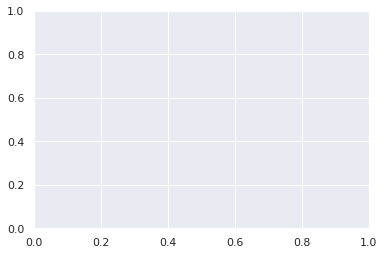

In [20]:
rates={}
for threshold in np.linspace(0.01,0.99,num=50):
    labels=results['benign'].map(lambda x:1 if x>threshold else 0)
    m=confusion_matrix(y_test,labels)
    rates[threshold]={
        'false positive rate':m[0,1]/m[0,:].sum(),
        'true positive rate':m[1,1]/m[1,:].sum()
    }
pd.DataFrame(rates).T.plot.scatter('false positive rate','true positive rete')